In [ ]:
#https://github.com/shala2020/shala2020.github.io/tree/master/Lecture_Materials/Google_Colab_Notebooks/DataScience/L2

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from matplotlib import pyplot as plt
from math import pi

#Types of data

TYPES OF DATA

Having a good understanding of the different data types, also called measurement scales, is a crucial prerequisite for doing Exploratory Data Analysis (EDA), since you can use certain statistical measurements only for specific data types.
You also need to know which data type you are dealing with to choose the right visualization method. Think of data types as a way to categorize different types of variables. 

https://towardsdatascience.com/data-types-in-statistics-347e152e8bee

https://www.geeksforgeeks.org/understanding-data-attribute-types-qualitative-and-quantitative/

In [3]:
#Visualizing data by loading dataframes
sample_data = pd.read_csv('sample_data.csv')
sample_data

,Unnamed: 0,column_a,column_b,column_c
0,0,1,1,10
1,1,2,4,8
2,2,3,9,6
3,3,4,16,4
4,4,5,25,2


In [4]:
#Pandas DataFrame is two-dimensional size-mutable, potentially heterogeneous tabular data structure
type(sample_data)

pandas.core.frame.DataFrame

In [5]:
# Shows datatype of a particular column
type(sample_data.column_c)

pandas.core.series.Series

In [6]:
# Extracting a column as a series
sample_data.column_c

0    10
1     8
2     6
3     4
4     2
Name: column_c, dtype: int64

In [7]:
# Extracting first element of the series 
sample_data.column_c.iloc[0]

10

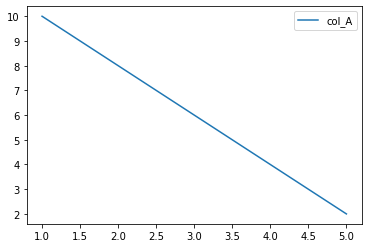

In [8]:
plt.plot(sample_data.column_a, sample_data.column_c)
plt.legend(["col_A", "col_C"])

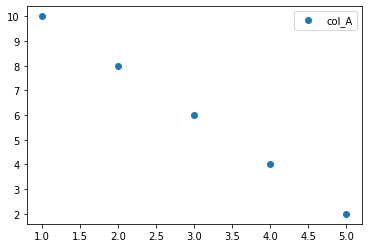

In [9]:
plt.plot(sample_data.column_a, sample_data.column_c, 'o')
plt.legend(["col_A", "col_C"])

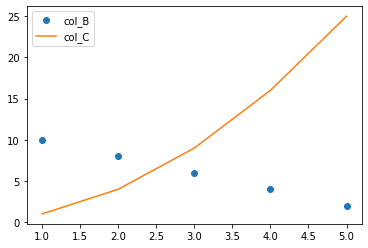

In [10]:
plt.plot(sample_data.column_a, sample_data.column_c, 'o')
plt.plot(sample_data.column_a, sample_data.column_b)
plt.legend(["col_B", "col_C"])

In [11]:
#Visualizing data on the populations of countries
data = pd.read_csv('countries.csv')
data = data.drop(['Unnamed: 0'], axis = 1)
data.head(5)

,country,year,population
0,Afghanistan,1952,8425333
1,Afghanistan,1957,9240934
2,Afghanistan,1962,10267083
3,Afghanistan,1967,11537966
4,Afghanistan,1972,13079460


In [12]:
# To have a complete look on the dataframe
####METHOD-1#####
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
#data

####METHOD-2#####
# with pd.option_context('display.max_rows' ,None, 'display.max_columns', None): 
#     display(data)

In [13]:
# Compare the population growth in the US and China
us = data[data.country == 'United States'] #No need to again assign it as dataframe(pd.DataFrame(data...)) ,it is already a dataframe.
china = data[data.country == 'China']
# print(us)
# print(china)
df = pd.concat([us, china], axis=0)
table = pd.pivot_table(df,index=['year','country'])
table

population
year country                  
1952 China           556263527
     United States   157553000
1957 China           637408000
     United States   171984000
1962 China           665770000
     United States   186538000
1967 China           754550000
     United States   198712000
1972 China           862030000
     United States   209896000
1977 China           943455000
     United States   220239000
1982 China          1000281000
     United States   232187835
1987 China          1084035000
     United States   242803533
1992 China          1164970000
     United States   256894189
1997 China          1230075000
     United States   272911760
2002 China          1280400000
     United States   287675526
2007 China          1318683096
     United States   301139947

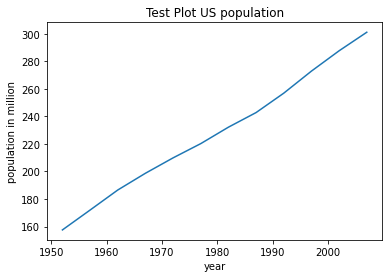

In [14]:
# Observe the population growth

#plt.plot(us.year, us.population) 
#Observe the 1e8 on the Y-axis 
#All the scores are above million to normalize or scaledown divide it.
plt.plot(us.year, us.population / 10**6)
plt.title('Test Plot US population')
plt.xlabel('year')
plt.ylabel('population in million')
plt.show()


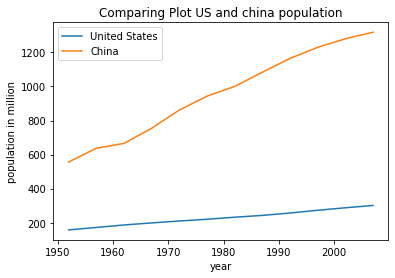

In [15]:
plt.plot(us.year, us.population / 10**6)
plt.plot(china.year, china.population / 10**6)
plt.legend(['United States', 'China'])
plt.title('Comparing Plot US and china population')
plt.xlabel('year')
plt.ylabel('population in million')
plt.show()

In [16]:
us.population

1608    157553000
1609    171984000
1610    186538000
1611    198712000
1612    209896000
1613    220239000
1614    232187835
1615    242803533
1616    256894189
1617    272911760
1618    287675526
1619    301139947
Name: population, dtype: int64

In [17]:
us.population / us.population.iloc[0] * 100

1608    100.000000
1609    109.159457
1610    118.396984
1611    126.123908
1612    133.222471
1613    139.787246
1614    147.371256
1615    154.109114
1616    163.052553
1617    173.219018
1618    182.589685
1619    191.135648
Name: population, dtype: float64

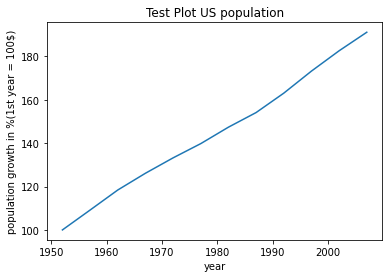

In [18]:
# Find the percentage growth from the first year 
plt.plot(us.year, us.population / us.population.iloc[0] * 100)
plt.title('Test Plot US population')
plt.xlabel('year')
plt.ylabel('population growth in %(1st year = 100$)')
plt.show()

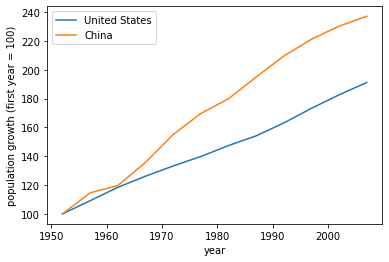

In [19]:
plt.plot(us.year, us.population / us.population.iloc[0] * 100)
plt.plot(china.year, china.population / china.population.iloc[0] * 100)
plt.legend(['United States', 'China'])
plt.xlabel('year')
plt.ylabel('population growth (first year = 100)')
plt.show()

In [20]:
#Visualizing data on movies
movies = pd.read_csv('moviesData.csv')
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

In [21]:
movies = movies.drop(['Unnamed: 0','Unnamed: 0.1'], axis = 1)
movies.head()

,title,title_type,genre,runtime,mpaa_rating,studio,thtr_rel_year,thtr_rel_month,thtr_rel_day,dvd_rel_year,dvd_rel_month,dvd_rel_day,imdb_rating,imdb_num_votes,critics_rating,critics_score,audience_rating,audience_score,best_pic_nom,best_pic_win,best_actor_win,best_actress_win,best_dir_win,top200_box,director,actor1,actor2,actor3,actor4,actor5
0,Filly Brown,Feature Film,Drama,80.0,R,Indomina Media Inc.,2013,4,19,2013.0,7.0,30.0,5.5,899,Rotten,45,Upright,73,no,no,no,no,no,no,Michael D. Olmos,Gina Rodriguez,Jenni Rivera,Lou Diamond Phillips,Emilio Rivera,Joseph Julian Soria
1,The Dish,Feature Film,Drama,101.0,PG-13,Warner Bros. Pictures,2001,3,14,2001.0,8.0,28.0,7.3,12285,Certified Fresh,96,Upright,81,no,no,no,no,no,no,Rob Sitch,Sam Neill,Kevin Harrington,Patrick Warburton,Tom Long,Genevieve Mooy
2,Waiting for Guffman,Feature Film,Comedy,84.0,R,Sony Pictures Classics,1996,8,21,2001.0,8.0,21.0,7.6,22381,Certified Fresh,91,Upright,91,no,no,no,no,no,no,Christopher Guest,Christopher Guest,Catherine O'Hara,Parker Posey,Eugene Levy,Bob Balaban
3,The Age of Innocence,Feature Film,Drama,139.0,PG,Columbia Pictures,1993,10,1,2001.0,11.0,6.0,7.2,35096,Certified Fresh,80,Upright,76,no,no,yes,no,yes,no,Martin Scorsese,Daniel Day-Lewis,Michelle Pfeiffer,Winona Ryder,Richard E. Grant,Alec McCowen
4,Malevolence,Feature Film,Horror,90.0,R,Anchor Bay Entertainment,2004,9,10,2005.0,4.0,19.0,5.1,2386,Rotten,33,Spilled,27,no,no,no,no,no,no,Stevan Mena,Samantha Dark,R. Brandon Johnson,Brandon Johnson,Heather Magee,Richard Glover


In [22]:
movies.shape

(600, 30)

#Types of Plots

HISTOGRAM


A histogram is a visual representation of the distribution of a dataset.

It is used to plot the frequency of score occurrences in a continuous dataset. 

(array([  2.,  35., 329., 179.,  40.,   8.,   4.,   1.,   0.,   1.]),
 array([ 39. ,  61.8,  84.6, 107.4, 130.2, 153. , 175.8, 198.6, 221.4,
        244.2, 267. ]),
 <a list of 10 Patch objects>)

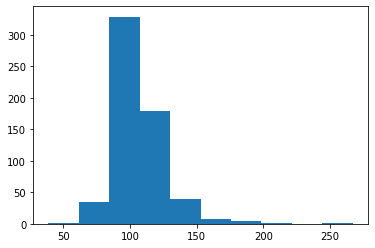

In [23]:
# Plot a histogram of the object named runtime in movies.
plt.hist(movies.runtime)

# Observe the warning in the output 
###Type-1####RuntimeWarning: invalid value encountered in greater_equal keep = (tmp_a >= first_edge) 
###Type-2#####(array([  2.,  35., 329., 179.,  40.,   8.,   4.,   1.,   0.,   1.]),
#array([ 39. ,  61.8,  84.6, 107.4, 130.2, 153. , 175.8, 198.6, 221.4, 244.2, 267. ]),
#This is an indication of missing values in the column.

# Observe the one outlier at point 250 on x-axis

In [24]:
# observe that the count of runtime is one less than 600
movies.runtime.describe()

count    599.000000
mean     105.884808
std       19.542042
min       39.000000
25%       93.000000
50%      102.000000
75%      115.000000
max      267.000000
Name: runtime, dtype: float64

In [25]:
# Drop the na datapoints 
print(movies.isna().sum())

movies = movies.dropna() 
print("shape after dropping the null values:",movies.shape)
# One can also impute the values

title                0
title_type           0
genre                0
runtime              1
mpaa_rating          0
studio               5
thtr_rel_year        0
thtr_rel_month       0
thtr_rel_day         0
dvd_rel_year         7
dvd_rel_month        7
dvd_rel_day          7
imdb_rating          0
imdb_num_votes       0
critics_rating       0
critics_score        0
audience_rating      0
audience_score       0
best_pic_nom         0
best_pic_win         0
best_actor_win       0
best_actress_win     0
best_dir_win         0
top200_box           0
director             2
actor1               2
actor2               7
actor3               9
actor4              12
actor5              14
dtype: int64
shape after dropping the null values: (572, 30)


(0.0, 300.0)

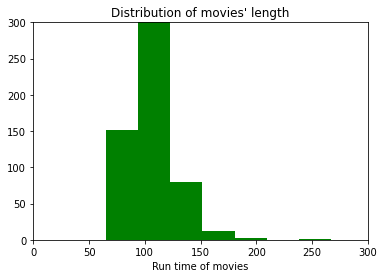

In [26]:
plt.hist(movies.runtime, bins = 7, color='green', orientation='vertical')
plt.title("Distribution of movies' length")
plt.xlabel("Run time of movies")
plt.xlim(0,300)
plt.ylim(0,300)

PIECHART

A pie chart is a circular chart

It is Divided into wedge-like sectors, illustrating proportion.

The total value of the pie is always 100 percent.

In [27]:
# create a pie chart from the object genre in the movies data frame.
# Type of genre_counts
genre_counts = movies.genre.value_counts()
print(genre_counts)

Drama                        298
Comedy                        86
Action & Adventure            62
Mystery & Suspense            56
Documentary                   40
Horror                        22
Science Fiction & Fantasy      8
Name: genre, dtype: int64


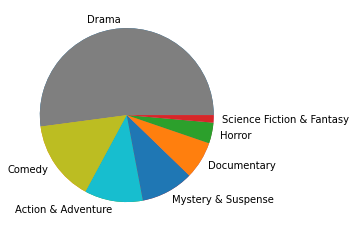

In [28]:
# Change the label of the pie chart
plt.pie(genre_counts)
# plt.pie(genre_counts, labels=genre_counts)
plt.pie(genre_counts, labels=genre_counts.index.tolist())
plt.show()


In [29]:
#slicing the dataframe
moviesSub = movies[0:10]
moviesSub.shape

(10, 30)

BARCHART

A bar chart represents data in rectangular bars with length of the bar proportional to the value of the variable.

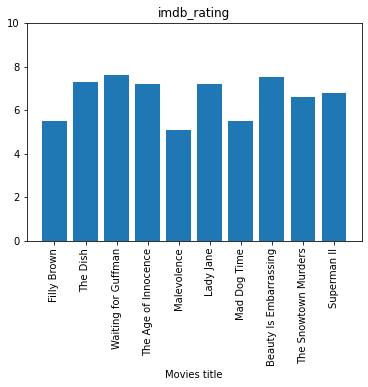

In [30]:
# draw a bar chart of the object named imdb underscore rating in movies.
plt.bar(moviesSub.title, moviesSub.imdb_rating)
plt.xlabel('Movies title')
plt.title('imdb_rating')
plt.xticks(rotation='vertical')
plt.ylim(0,10)
plt.show()

In [31]:
# After we know the shape of the data, the data types, and other useful statistical information, 
# it will be easier to pick the right visualization type.

https://www.geeksforgeeks.org/data-visualization-different-charts-python/

https://towardsdatascience.com/data-science-with-python-intro-to-data-visualization-and-matplotlib-5f799b7c6d82

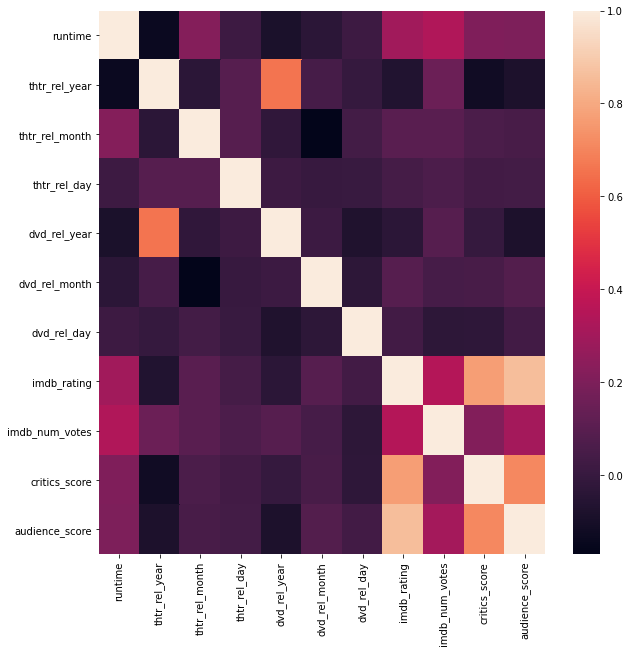

In [32]:
plt.figure(figsize=(10,10))
# mask = np.zeros_like(movies.corr(), dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True
sns.heatmap(movies.corr())
# vmin = -1, cmap='coolwarm', annot=True, mask = mask

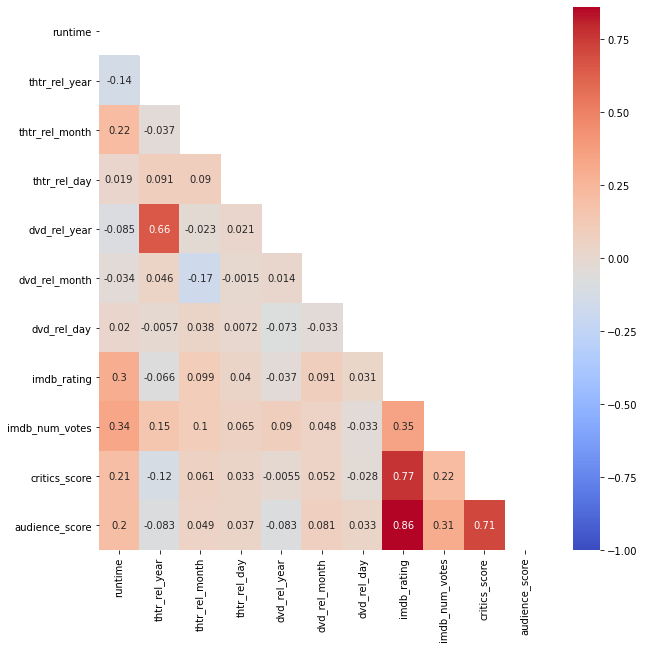

In [33]:
plt.figure(figsize=(10,10))
mask = np.zeros_like(movies.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(movies.corr(),vmin = -1, cmap='coolwarm', annot=True, mask = mask)

Scatter plot

Scatter plot is a graph in which the values of two variables are plotted along two axes.
The pattern of the resulting points reveals the correlation.

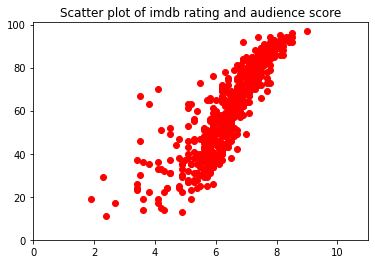

In [34]:
# imdb underscore rating and audience underscore score.
plt.scatter(movies.imdb_rating, movies.audience_score, c='red')
plt.xlim(0,11) # imdb varies from 0 to 10
plt.ylim(0,101) # audience varies from 0 to 100
plt.title('Scatter plot of imdb rating and audience score')
plt.show()
# Concept of correlation is needed here (intuition wise).
# Difference between auto-correlation (do not mix with correlation)

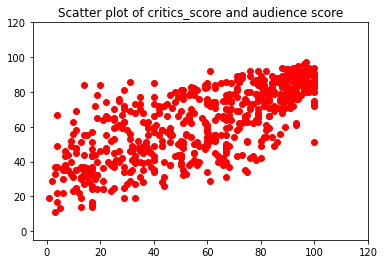

In [35]:
plt.scatter(movies.critics_score, movies.audience_score, c='red')
plt.xlim(-5,120) # imdb varies from -5 to 120
plt.ylim(-5,120) # audience varies from -5 to 120
plt.title('Scatter plot of critics_score and audience score')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


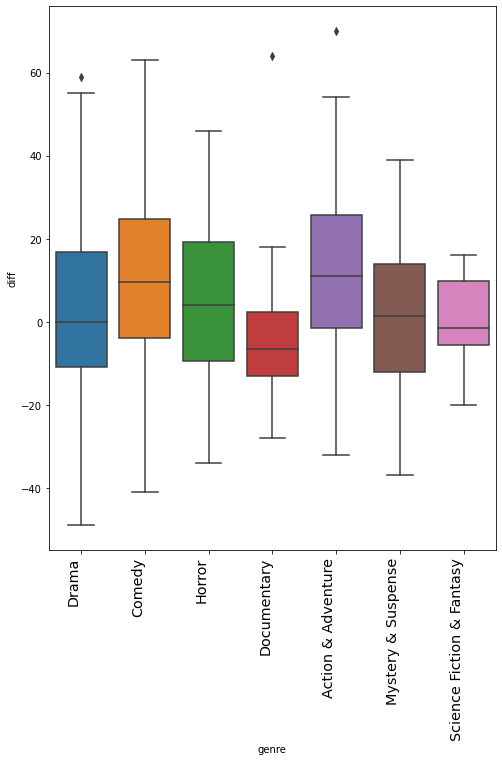

In [36]:
# How to deal with outliers 

# Range, quartile, information in boxplot 
#Q1(LOWER QUARTILE). Q2(MEDIAN). Q3(HIGHER QUARTILE)
plt.figure(figsize=(8,10))
movies['diff'] = movies['audience_score'] - movies['critics_score']
chart = sns.boxplot('genre', 'diff', data=movies)
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')
plt.show()

#Measures of Central Tendency

Single value which attempts to describe a set of data by mean,median,mode.

Median is used when data is skewed.

when data has normal distribution median,mode,mean are identical.

Order Statistics:

Statistical methods that depend on the order of the data and not on numerical values.
Median is order based.

#Various distributions

Probability Distributions allows to recognize patterns in otherwise completely random variables.

Discrete vs Continuous Random Variable Distributions:
Discrete variables have a discrete set of possible values, each of them with a non-zero probability.

A continuous random variable can take any value in a given (continuous) interval.


Bernoulli Probability Distribution

It represents a binary event: “this happened” vs “this didn’t happen”, and takes a value pas its only parameter, which represents the probability that the event will occur.

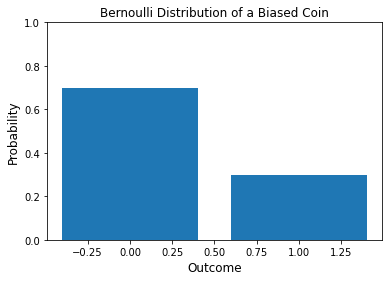

In [46]:
#Tossing a biased coin
probs = np.array([0.70, 0.3])
side = [0, 1]
plt.bar(side, probs)
plt.title('Bernoulli Distribution of a Biased Coin', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.xlabel('Outcome', fontsize=12)
axes = plt.gca()
axes.set_ylim([0,1])
plt.show()

Uniform Probability Distribution

There are two kinds of uniform random variables: discrete and continuous ones.

A discrete uniform distribution will take a (finite) set of values S, and assign a probability of 1/n to each of them, where n is the amount of elements in S.

A continuous uniform distribution, instead, only takes two values a and b as parameters, and assigns the same density to each value in the interval between them.

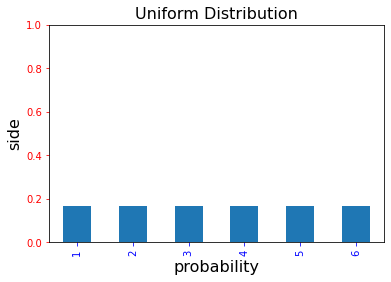

In [38]:
#Rolling a dice
# Skewed pictorial representation 
probs = [1/6]*6
side = [1,2,3,4,5,6]
s = pd.Series(probs,side)

#Set descriptions:
plt.title("Uniform Distribution",fontsize=16)
plt.ylabel('side', fontsize=16)
plt.xlabel('probability',fontsize=16)

#Set tick colors:
ax = plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='red')
ax.set_ylim([0,1])

#Plot the data:


s.plot(kind = 'bar')

plt.show()

Binomial Probability Distribution



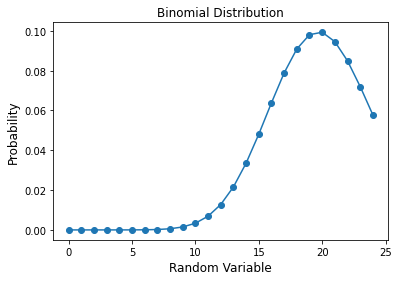

In [45]:
#Tossing a coin certain number of times


x = np.arange(0, 25)
prob = 0.2
p = 100   # shape parameter
binom = stats.binom.pmf(x,p, prob)
plt.plot(x, binom, '-o')
plt.xlabel('Random Variable', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.title("Binomial Distribution")
plt.show()

Normal Probability Distributions

Normally distributed variables are so commonly found in nature, they’re actually the norm. That’s actually where the name comes from.

It can also be shown that if you take a sample of any random variable and average those measures, and repeat that process many times, that average will also have a normal distribution. That fact’s so important, it’s called the fundamental theorem of statistics.

Normally distributed variables:

1.  Are symmetrical, centered around a mean (usually called μ).
2.   Can take all values on the real space, but only deviate two sigmas from the norm 5% of the time.
3.   Are literally everywhere.

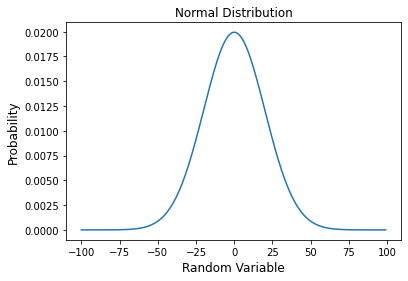

In [44]:
#Gaussian Distribution
n = np.arange(-100, 100)
mean = 0
normal = stats.norm.pdf(n, mean, 20)
plt.plot(n, normal)
plt.xlabel('Random Variable', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.title("Normal Distribution")
plt.show()

Exponential Probability Distribution

Exponential probability distributions appear everywhere, too.

They are heavily linked to a Probability concept called a Poisson Process.

Poisson Process is “a process in which events occur continuously and independently at a constant average rate“




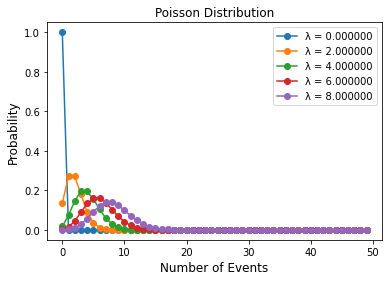

In [41]:
#Poisson Distribution

# n = number of events, lambd = expected number of events which can take place in a period
# The Poisson distribution is the discrete probability distribution of the number of events 
# occurring in a given time period, given the average number of times the event occurs over that time period.
n = np.arange(0, 50)
for Lambda in range(0,10,2):
    poisson = stats.poisson.pmf(n, Lambda)
    plt.plot(n, poisson, '-o', label="λ = {:f}".format(Lambda))
    plt.xlabel('Number of Events', fontsize=12)
    plt.ylabel('Probability', fontsize=12)
    plt.title("Poisson Distribution")
    plt.legend()

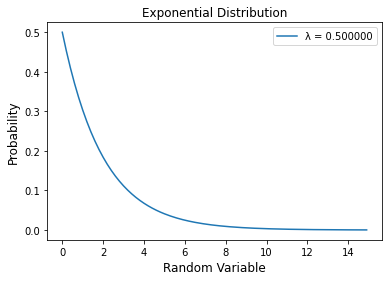

In [43]:
Lambda = 0.5
x = np.arange(0, 15, 0.1)
y = Lambda*np.exp(-Lambda*x)
plt.plot(x,y, label="λ = {:f}".format(Lambda))
plt.xlabel('Random Variable', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.title("Exponential Distribution")
plt.legend()
plt.show()